In [ ]:
from keras.datasets import mnist
import numpy as np 
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [ ]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("data sizes are :",X_train.shape,y_train.shape,X_test.shape,y_test.shape)

data sizes are : (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


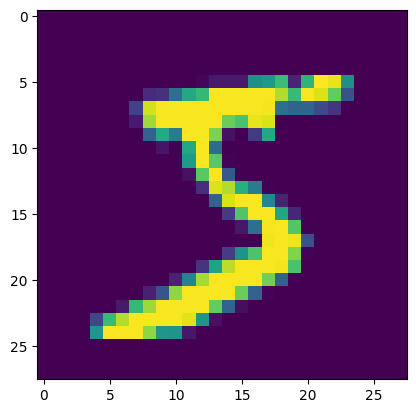

In [ ]:
#plot the first image in the dataset
plt.imshow(X_train[0])

In [ ]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [ ]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from keras.models import  Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization

model = Sequential()

model.add(Conv2D(64, kernel_size=3 ,strides = 1 , padding = 'same' , activation = "relu", input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(32, kernel_size=3 ,strides = 1 , padding = 'same' , activation = "relu", input_shape=(28,28,1)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
#model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())
model.add(Dense(units = 10 , activation = 'softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 32)       1

In [ ]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 155s 82ms/step - loss: 0.1357 - accuracy: 0.9619 - val_loss: 0.0920 - val_accuracy: 0.9748
Epoch 2/3
1875/1875 [==============================] - 140s 74ms/step - loss: 0.0610 - accuracy: 0.9823 - val_loss: 0.0564 - val_accuracy: 0.9839
Epoch 3/3
1875/1875 [==============================] - 148s 79ms/step - loss: 0.0405 - accuracy: 0.9877 - val_loss: 0.0404 - val_accuracy: 0.9881


In [ ]:
#predict first 4 images in the test set
cnn_prediction = model.predict(X_test[::4])
cnn_prediction

79/79 [==============================] - 1s 14ms/step


array([[4.8336283e-12, 3.9190127e-17, 1.6742089e-11, ..., 9.9999994e-01,
        3.2422639e-14, 2.2846230e-10],
       [1.9392474e-15, 1.6270532e-15, 6.4525483e-15, ..., 1.6290600e-14,
        2.5682971e-11, 1.6801237e-11],
       [4.6701675e-07, 2.3599793e-13, 1.5452539e-11, ..., 7.4339833e-14,
        1.2974625e-05, 3.4658687e-08],
       ...,
       [5.4892077e-13, 6.3672941e-19, 7.3936437e-16, ..., 9.2717613e-16,
        1.3181886e-10, 1.6661351e-12],
       [1.4469777e-10, 8.7758475e-14, 7.8255024e-12, ..., 5.2303481e-08,
        5.6661575e-10, 9.9869436e-01],
       [4.3815698e-12, 5.4090277e-13, 6.8283568e-10, ..., 7.3096119e-13,
        8.1423697e-13, 2.6170863e-10]], dtype=float32)

In [ ]:
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

313/313 [==============================] - 6s 18ms/step - loss: 0.0404 - accuracy: 0.9881
Accuracy of the model is -  98.8099992275238 %
